<a href="https://colab.research.google.com/github/Tonioord/challenge-telecom-x-analisis-evasion-clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📚 Bibliotecas y librerias

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import datetime
import chardet
from scipy.stats import pointbiserialr,chi2_contingency

📌 Extracción

In [9]:

urlAPI = 'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'
raw_data = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
# Requests para obtener la respuesta de la URL
acceso = requests.get(raw_data)
jsondata = json.loads(acceso.text)
df = pd.DataFrame(jsondata) # Pasamos a df


In [10]:
#Exploramos la extraccion del DF

df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Vemos que es una serie de datos anidados por lo que procedemos a la transformación de los datos

🔧 Transformación

In [11]:
df = pd.json_normalize(jsondata) # Normalizamos la dataset
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
columnas_diccionario = [
    'ID_Cliente',
    'Desercion',
    'Genero',
    'Adulto_Mayor',
    'Pareja',
    'Dependientes',
    'Antiguedad_Meses',
    'Servicio_Telefono',
    'Lineas_Multiples',
    'Servicio_Internet',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Tipo_Contrato',
    'Facturacion_Sin_Papel',
    'Metodo_Pago',
    'Cargo_Mensual',
    'Cargo_Total'
]

In [17]:
#Queremos respetar el nombre de las columnas de acuerdo al diccionario asignado
df.columns.tolist()
mapping = dict(zip(df.columns, columnas_diccionario))
df = df.rename(columns=mapping)
df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
#Procedemos a la limpieza de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7267 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   object 
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_Online        7267 non-null   object 
 11  Respaldo_Online         7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [26]:
#Vemos que cargo total es de tipo objecto por lo que probablemente los null se encuentran en un formato " ", verificamos en que otra columna se puedue replicar y errores similares
# 1. Identificamos columnas con NaNs (nulos reales)
null_counts = df.isna().sum()
columnas_con_nan = null_counts[null_counts > 0].index.tolist()

# 2. Tu lógica mejorada para encontrar vacíos (strings con espacios)
columnas_con_vacios = [
    col for col in df.columns
    if df[col].dtype == 'object' and df[col].astype(str).str.strip().eq('').any()
]

# 3. Reporte de diagnóstico
print(f"📊 Reporte de limpieza:")
print(f"- Columnas con NaN reales: {columnas_con_nan}")
print(f"- Columnas con strings vacíos: {columnas_con_vacios}")

📊 Reporte de limpieza:
- Columnas con NaN reales: []
- Columnas con strings vacíos: ['Desercion', 'Cargo_Total']


In [27]:
#Para que Pandas pueda tratarlos de forma uniforme, lo más eficiente es convertir todos esos strings vacíos ('') en np.nan. Esto te permitirá usar métodos como .fillna() o .dropna().
# Reemplazamos espacios en blanco por NaN en todo el DataFrame
df = df.replace(r'^\s*$', np.nan, regex=True)

# Ahora puedes ver el conteo real de nulos totales
print("\nConteo total de nulos tras la conversión:")
print(df.isna().sum())


Conteo total de nulos tras la conversión:
ID_Cliente                  0
Desercion                 224
Genero                      0
Adulto_Mayor                0
Pareja                      0
Dependientes                0
Antiguedad_Meses            0
Servicio_Telefono           0
Lineas_Multiples            0
Servicio_Internet           0
Seguridad_Online            0
Respaldo_Online             0
Proteccion_Dispositivo      0
Soporte_Tecnico             0
TV_Streaming                0
Peliculas_Streaming         0
Tipo_Contrato               0
Facturacion_Sin_Papel       0
Metodo_Pago                 0
Cargo_Mensual               0
Cargo_Total                11
dtype: int64


In [35]:
# Corrección específica para la columna financiera cargostotales
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce').fillna(0)
df['Cargo_Total'] = df['Cargo_Total'].fillna(0)
# Creamos la variable binaria para la correlación (Deserción: Yes=1, No=0)
df['Desercion_Binaria'] = df['Desercion'].map({'Yes': 1, 'No': 0})
print("✅ Tipos de datos corregidos:")
print(df[['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Desercion_Binaria']].dtypes)

✅ Tipos de datos corregidos:
Antiguedad_Meses       int64
Cargo_Mensual        float64
Cargo_Total          float64
Desercion_Binaria    float64
dtype: object


📊 Carga y análisis

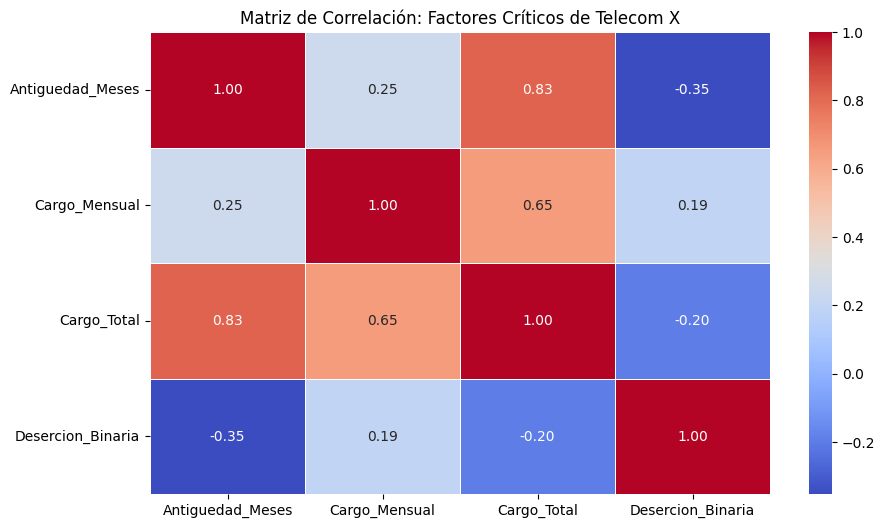

In [36]:
# Seleccionamos las variables cuantitativas y nuestra variable objetivo
cols_analisis = ['Antiguedad_Meses', 'Cargo_Mensual', 'Cargo_Total', 'Desercion_Binaria']
matriz_corr = df[cols_analisis].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación: Factores Críticos de Telecom X")
plt.show()

Límite superior estadístico para Cargo Mensual: $171.55
Número de clientes con cargos atípicos: 0


/tmp/ipython-input-1537230091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Desercion', y='Cargo_Mensual', data=df, palette='Set2')


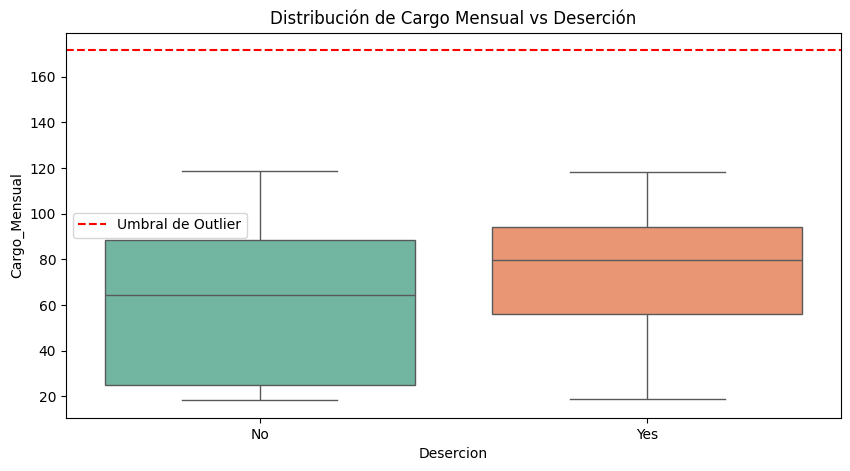

In [37]:
#Análisis de Outliers (Detección de Anomalías)
#Utilizaremos el método de Tukey para identificar valores que se alejan significativamente de la masa central de los datos. Esto es fundamental para entender si la descerción está ligada a facturaciones inusualmente altas.
def detectar_outliers(data, columna):
    q1 = data[columna].quantile(0.25)
    q3 = data[columna].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr

    outliers = data[data[columna] > limite_superior]
    return outliers, limite_superior

# Analizamos Cargo_Mensual
outliers_df, ls = detectar_outliers(df, 'Cargo_Mensual')

print(f"Límite superior estadístico para Cargo Mensual: ${ls:.2f}")
print(f"Número de clientes con cargos atípicos: {len(outliers_df)}")

# Visualización con Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Desercion', y='Cargo_Mensual', data=df, palette='Set2')
plt.axhline(ls, color='r', linestyle='--', label='Umbral de Outlier')
plt.title("Distribución de Cargo Mensual vs Deserción")
plt.legend()
plt.show()

In [39]:
# Lista de servicios a analizar
servicios = [
    'Servicio_Internet', 'Seguridad_Online', 'Soporte_Tecnico',
    'Respaldo_Online', 'Proteccion_Dispositivo'
]

print("--- Análisis de Proporción de Deserción por Servicio ---")

for svc in servicios:
    # Creamos la tabla de contingencia normalizada por fila (porcentajes)
    tabla = pd.crosstab(df[svc], df['Desercion'], normalize='index') * 100
    print(f"\nTabla para {svc}:")
    print(tabla)

    # Cálculo estadístico Chi-cuadrado para validar significancia
    # H0: Las variables son independientes
    contingency = pd.crosstab(df[svc], df['Desercion'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"P-valor (Chi2): {p:.4f}")

--- Análisis de Proporción de Deserción por Servicio ---

Tabla para Servicio_Internet:
Desercion                 No        Yes
Servicio_Internet                      
DSL                81.040892  18.959108
Fiber optic        58.107235  41.892765
No                 92.595020   7.404980
P-valor (Chi2): 0.0000

Tabla para Seguridad_Online:
Desercion                   No        Yes
Seguridad_Online                         
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194
P-valor (Chi2): 0.0000

Tabla para Soporte_Tecnico:
Desercion                   No        Yes
Soporte_Tecnico                          
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341
P-valor (Chi2): 0.0000

Tabla para Respaldo_Online:
Desercion                   No        Yes
Respaldo_Online                          
No                   60.071244  39.928756
No intern

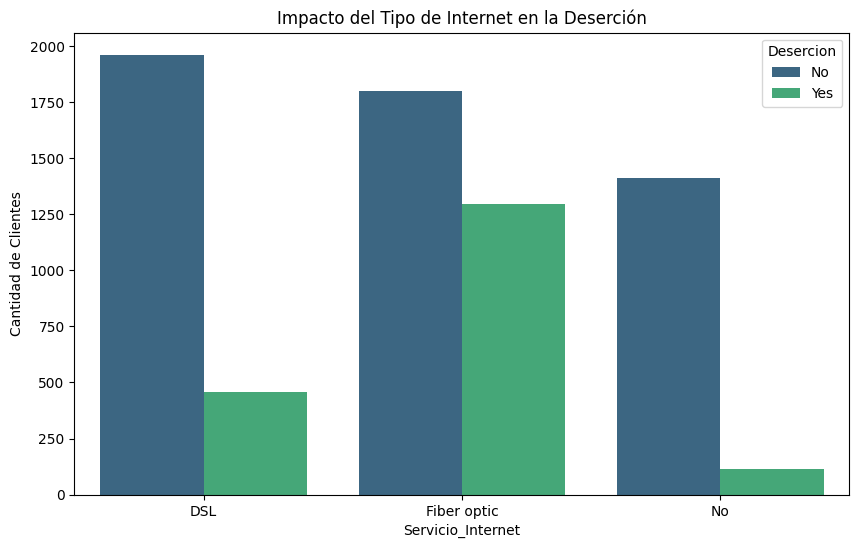

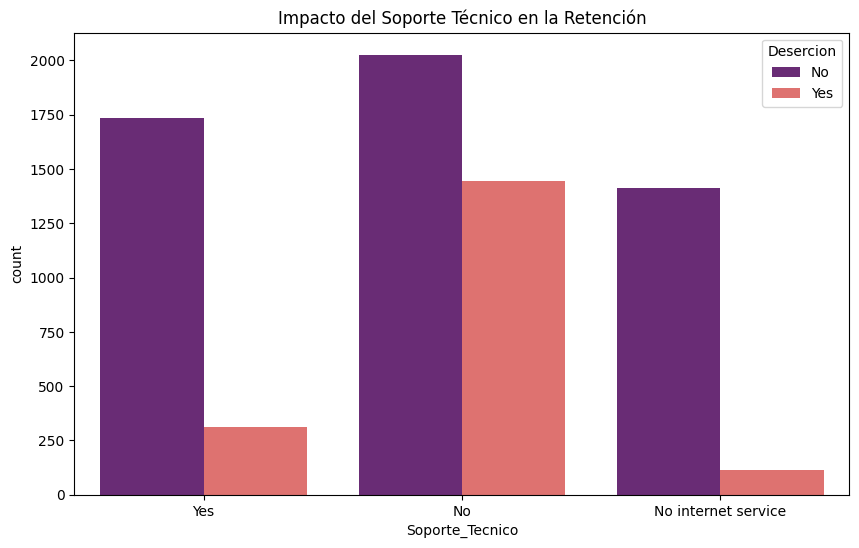

In [40]:
# Visualización del servicio de Internet (Suele ser el más crítico)
plt.figure(figsize=(10, 6))
sns.countplot(x='Servicio_Internet', hue='Desercion', data=df, palette='viridis')
plt.title('Impacto del Tipo de Internet en la Deserción')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Visualización de Soporte Técnico
plt.figure(figsize=(10, 6))
sns.countplot(x='Soporte_Tecnico', hue='Desercion', data=df, palette='magma')
plt.title('Impacto del Soporte Técnico en la Retención')
plt.show()